## Are Russia’s Allies, its True Supporters?


The following python code and data visualization is based on the article was published in the Economist on March 31st 2023 under the title "Who are Russia's supporters?". 

According to this article, the number of countries openly criticizing Russia has decreased compared to the previous year. But this article claims these countries that have toned down their condemnation are not of much practical use to Vladimir Putin, Russia President, and his aggressive actions.

In this python project, the data was obtained from the Economist data source and we cleaned and used them to show the dependency and relations of Russia and its supporter countries in graph. 

This project doesn't contain all the data regarding the countries and their cooperations with Moscow.

## Aim

In this project, we show how to clean data and do visualization in Jupyter note book. Matplotlib and Seaborn are python libraries that are used for data visualization. They have inbuilt modules for plotting different graphs.
While Tableau has a full capacity for the graphs and data visualization, but you can also use python libraries in some extended capacity.
While Matplotlib is used to embed graphs into applications, Seaborn is primarily used for statistical graphs. 

## Data

##### You can find the data source and article from the following link and create your own project:

https://www.economist.com/graphic-detail/2023/03/31/who-are-russias-supporters

### Libraries Used

In [318]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [319]:
df = pd.read_csv('PutinsPals.csv')



In [320]:
df.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Country,UN: did not vote against Russia,Voted with Russia at least twice,Supplying arms to Russia since the start of th...,CSTO member,Russian troops mercenaries present,Held joint military drills since Feb 2022,Arms dependent,Nuclear dependent,Gas dependent,Increased exports since Feb 2022,More than 10% of total goods trade with Russia,Total score
1,Belarus,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,11
2,Armenia,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,9
3,Kyrgyzstan,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,8
4,Iran,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,6
5,Tajikistan,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,6
6,Kazakhstan,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,6
7,Syria,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,5
8,China,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,5
9,Venezuela,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,5


In [321]:
# Fill NAs with 0s
df = df.fillna(0)


In [322]:
# Create a dictionary to map the old column names to the new column names

new_column_names = {
    'Unnamed: 0': 'Country',
    'Unnamed: 1': 'Not Voted Against Russia',
    'Unnamed: 2': 'Voted for Russia',
    'Unnamed: 3': 'Arms Supplier',
    'Unnamed: 4': 'CSTO member',
    'Unnamed: 5': 'Russian Troops Mercenaries Present',
    'Unnamed: 6': 'Joint military drills',
    'Unnamed: 7': 'Arms dependent',
    'Unnamed: 8': 'Nuclear dependent',
    'Unnamed: 9': 'Gas dependent',
    'Unnamed: 10': 'Increased exports',
    'Unnamed: 11': 'At least 10% trade'
    
}


In [323]:
df.rename(columns=new_column_names, inplace=True)


In [324]:
column_name = 'Unnamed: 12'  # Replace 'column_name' with the actual column name you want to drop

# Drop the column
df = df.drop('Unnamed: 12', axis=1)

In [325]:
# Drop the row with index 13 to 22
df.drop(13, inplace=True)
df.drop(14, inplace=True)
df.drop(15, inplace=True)
df.drop(16, inplace=True)
df.drop(17, inplace=True)
df.drop(18, inplace=True)
df.drop(19, inplace=True)
df.drop(20, inplace=True)
df.drop(21, inplace=True)
df.drop(22, inplace=True)



In [326]:
df

,Country,Not Voted Against Russia,Voted for Russia,Arms Supplier,CSTO member,Russian Troops Mercenaries Present,Joint military drills,Arms dependent,Nuclear dependent,Gas dependent,Increased exports,At least 10% trade
0,Country,UN: did not vote against Russia,Voted with Russia at least twice,Supplying arms to Russia since the start of th...,CSTO member,Russian troops mercenaries present,Held joint military drills since Feb 2022,Arms dependent,Nuclear dependent,Gas dependent,Increased exports since Feb 2022,More than 10% of total goods trade with Russia
1,Belarus,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
2,Armenia,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
3,Kyrgyzstan,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
4,Iran,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
5,Tajikistan,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE
6,Kazakhstan,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
7,Syria,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
8,China,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
9,Venezuela,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE


In [327]:
df.drop(df.index[0], inplace=True)
df

,Country,Not Voted Against Russia,Voted for Russia,Arms Supplier,CSTO member,Russian Troops Mercenaries Present,Joint military drills,Arms dependent,Nuclear dependent,Gas dependent,Increased exports,At least 10% trade
1,Belarus,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
2,Armenia,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
3,Kyrgyzstan,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
4,Iran,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
5,Tajikistan,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE
6,Kazakhstan,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
7,Syria,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
8,China,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
9,Venezuela,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
10,Nicaragua,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE


#### According the data, Iran and Belarus are Russia's allies which provide arms to the Moscow. All the allies except Uzbekistan are arm importer from Russia.

(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

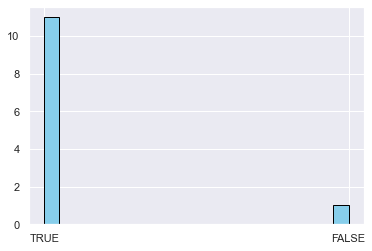

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.hist(df['Arms dependent'], bins=20, color='skyblue', edgecolor='black')  # Create the histogram


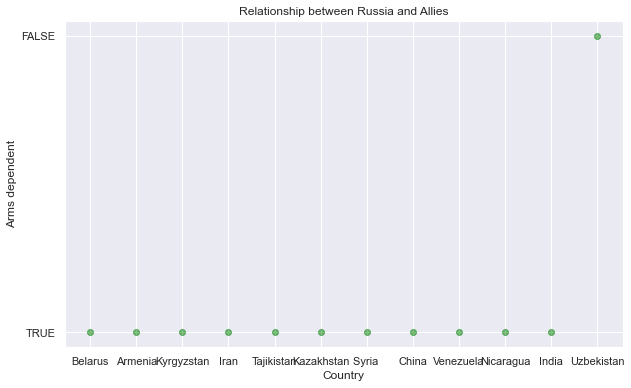

In [329]:
# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))  # Set the size of the plot

#The alpha parameter sets the transparency of the data points, making it easier to see overlapping points.

plt.scatter(df['Country'], df['Arms dependent'], alpha=0.5, color='green')  # Create the scatter plot

plt.title('Relationship between Russia and Allies')  # Set the title of the plot
plt.xlabel('Country')  # Set the label for the x-axis
plt.ylabel('Arms dependent')  # Set the label for the y-axis

plt.grid(True)  # Add a grid to the plot

plt.show()  # Display the plot


#### Three countries in the group of Putin's allies voted for Russia in the UN. Nicaragua, Syria and Belarus.

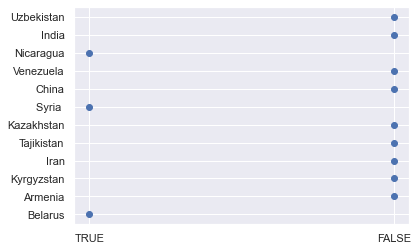

In [333]:
sns.set()
plt.scatter(df['Voted for Russia'], df['Country'])

#### Eventhough, not all the allies of Russia voted for it, but non of them voted against it too. 

##### The following bar chart shows randomly Putin's allies with three factors: At least 10% trade with Russia, Voted for Russia and Arms Supplier. 
#### This bar chart shows the correlation between these factors.

In [334]:
df.columns = df.columns.str.strip()

# Now you can use the column names without any leading or trailing whitespaces
cross_tab = pd.crosstab(df['Country'], df['Arms dependent'])

<AxesSubplot:>

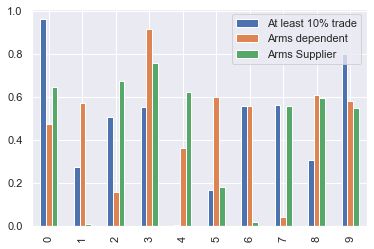

In [335]:
df = pd.DataFrame(np.random.rand(10, 3), columns=['At least 10% trade','Arms dependent', 'Arms Supplier'])
df.plot.bar()

<Figure size 720x432 with 0 Axes>

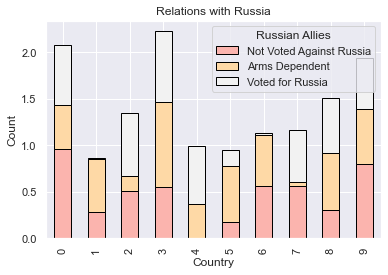

In [340]:

# Create a stacked bar plot using matplotlib
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create the stacked bars for each 'Country'
df.plot(kind='bar', stacked=True, colormap='Pastel1', edgecolor='black')

plt.title('Relations with Russia')  # Set the title of the plot
plt.xlabel('Country')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis

plt.grid(True)  # Add a grid to the plot

plt.legend(title='Russian Allies', loc='upper right', labels=['Not Voted Against Russia', 'Arms Dependent', 'Voted for Russia'])  # Add legend with labels

plt.show()  # Display the plot

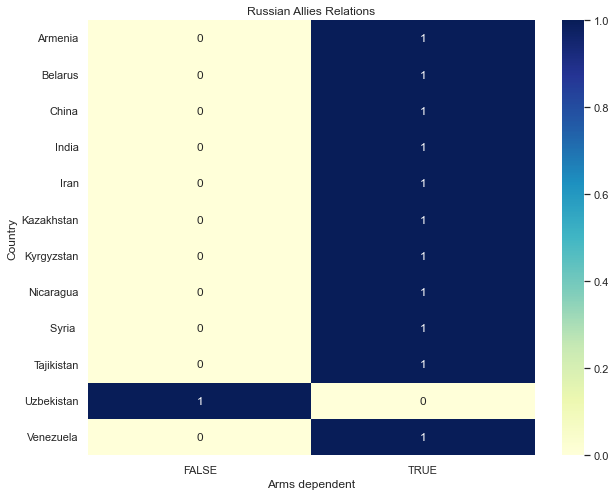

In [336]:
plt.figure(figsize=(10, 8))  # Set the size of the heatmap (optional)
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Russian Allies Relations")
plt.show()

## Conclusion

##### As you can find in the bar chart and scatter plots, the countries that didn't vote against Russia and have trade with Moscow are not necessarily supporting the country in the international society.

##### The Economist emphasises that on the surface, Russia seems to have gained significant support in the past year. However, in reality, these alliances and friendships may not be as meaningful or substantial as they appear.